# Importación de librerías

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")


# Muestreo de dataset descargado

In [60]:
df = pd.read_csv("../data/raw/prices_dirty_2019_2025.csv")

df.head()


,date,ticker,open,high,low,close,adj_close,volume
0,2019-09-01,BTC-USD,9630.592773,9796.755859,NaN,9757.970703,9757.970703,1.144536e+10
1,2019-09-01,ETH-USD,172.458405,173.696854,169.531281,171.629425,171.629425,5.554800e+09
2,2019-09-02,BTC-USD,9757.473633,10396.591797,9730.650391,10346.760742,10346.760742,1.724810e+10
3,2019-09-02,ETH-USD,171.697601,180.145218,170.451691,178.347351,178.347351,6.503447e+09
4,2019-09-02,^FTSE,7207.200195,7315.299805,7206.899902,7281.899902,7281.899902,4.977649e+08


#Dimensiones y tipos

In [61]:
print("Dimensiones:", df.shape)
df.info()


Dimensiones: (100304, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100304 entries, 0 to 100303
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       100304 non-null  object 
 1   ticker     100304 non-null  object 
 2   open       98323 non-null   float64
 3   high       98337 non-null   float64
 4   low        98272 non-null   float64
 5   close      98307 non-null   float64
 6   adj_close  98315 non-null   float64
 7   volume     98352 non-null   float64
dtypes: float64(6), object(2)
memory usage: 6.1+ MB


#Estadisticas descriptivas

In [62]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,100304,2277,2022-10-13,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ticker,100304,63,BTC-USD,2277,NaN,NaN,NaN,NaN,NaN,NaN,NaN
open,98323.0,NaN,NaN,NaN,2675.47526,9491.327837,-14.0,55.692858,139.520004,429.691572,124752.140625
high,98337.0,NaN,NaN,NaN,2715.104882,9659.086378,0.559759,56.396343,141.383816,437.40917,126198.070312
low,98272.0,NaN,NaN,NaN,2642.795067,9355.597218,-40.32,54.941309,137.797587,425.472116,123196.046875
close,98307.0,NaN,NaN,NaN,2686.331926,9647.698796,-37.630001,55.825838,139.751678,432.699432,357024.796875
adj_close,98315.0,NaN,NaN,NaN,2687.632254,9531.264151,-37.630001,55.747988,139.774292,432.22287,124752.53125
volume,98352.0,NaN,NaN,NaN,1445690774.335113,6891764036.879344,0.0,1461775.0,7140200.0,40978700.0,350967941479.0


#Revisión de valores nulos

In [63]:
df.isna().sum()

date            0
ticker          0
open         1981
high         1967
low          2032
close        1997
adj_close    1989
volume       1952
dtype: int64

# Duplicados
## Sin duplicados, genial

In [64]:
df.duplicated().sum()


0

In [65]:
df.duplicated(subset=["date", "ticker"]).sum()


0

# Baremo temporal del df
## Justo como lo indiqué en la descarga de este

In [66]:
print("Fecha mínima:", df["date"].min())
print("Fecha máxima:", df["date"].max())


Fecha mínima: 2019-09-01
Fecha máxima: 2025-11-24


# Tickers viene siendo la llave principal
## Estan todas las que quería

In [67]:
df["ticker"].nunique(), df["ticker"].unique()[:10]


(63,
 array(['BTC-USD', 'ETH-USD', '^FTSE', '^HSI', '^IBEX', '^N225',
        '^STOXX50E', 'AAPL', 'ABBV', 'AMD'], dtype=object))

# Gráfica de la "media" del precio de cierre
## Podemos observar que los valores no están normalizados, por lo que la gráfica nos da valores altísimos

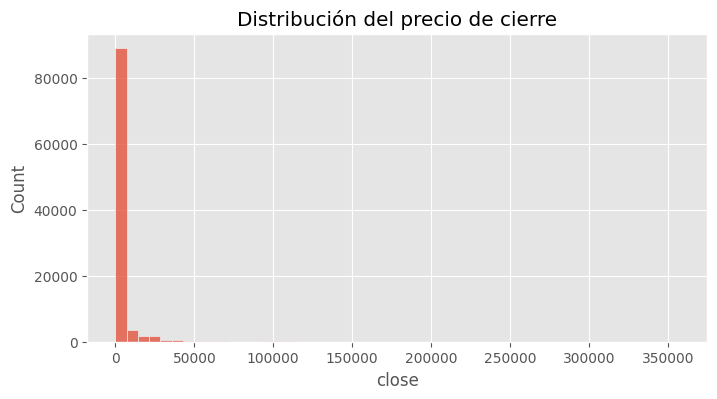

In [68]:
plt.figure(figsize=(8,4))
sns.histplot(df["close"], bins=50)
plt.title("Distribución del precio de cierre")
plt.show()


# Valores nulos
## Observamos que están bien distribuidos en el tiempo

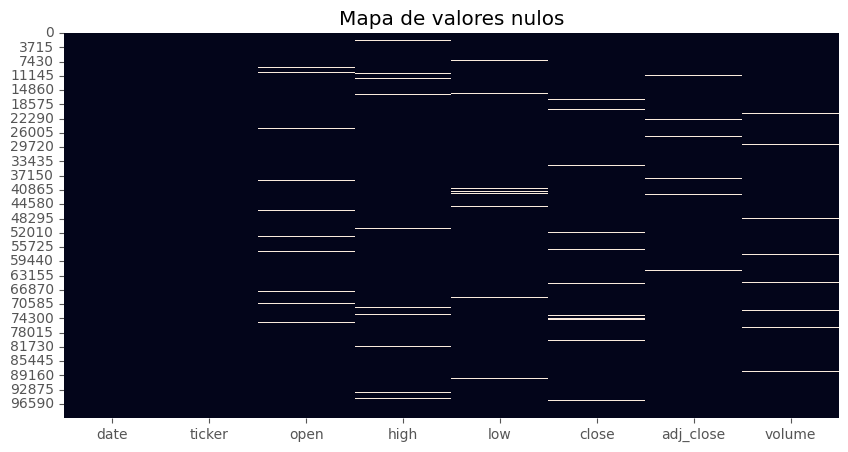

In [69]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(), cbar=False)
plt.title("Mapa de valores nulos")
plt.show()


# Valores negativos
## Estos realmente existen, en noviembre de 2020 el petroleo estaba en negativo

In [70]:
df[(df["open"] < 0) | (df["close"] < 0)].head()

,date,ticker,open,high,low,close,adj_close,volume
9776,2020-04-20,CL=F,17.73,17.85,-40.32,-37.630001,-37.630001,247947.0
9838,2020-04-21,CL=F,-14.00,13.86,-16.74,10.010000,10.010000,2288230.0


# Valores en porcentajes

In [71]:
df["close"].describe(percentiles=[0.99, 0.999])

count     98307.000000
mean       2686.331926
std        9647.698796
min         -37.630001
50%         139.751678
99%       43292.398984
99.9%    110247.277422
max      357024.796875
Name: close, dtype: float64

In [72]:
# Conversión de fecha y orden
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values(["ticker", "date"]).reset_index(drop=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100304 entries, 0 to 100303
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date       100304 non-null  datetime64[ns]
 1   ticker     100304 non-null  object        
 2   open       98323 non-null   float64       
 3   high       98337 non-null   float64       
 4   low        98272 non-null   float64       
 5   close      98307 non-null   float64       
 6   adj_close  98315 non-null   float64       
 7   volume     98352 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 6.1+ MB


In [73]:
num_cols = ["open", "high", "low", "close", "adj_close", "volume"]

# Ordenamos por si acaso
df = df.sort_values(["ticker", "date"]).reset_index(drop=True)

df[num_cols] = (
    df.groupby("ticker")[num_cols]
      .transform(lambda g: g.ffill().bfill())
)



In [ ]:
mask_zero = df["volume"] == 0
print("Filas con volumen = 0:", mask_zero.sum())

df.loc[mask_zero, "volume"] = np.nan

#Si los valores son 0 se rellenan con el último valor de esa empresa que se conoce
#Ya que es imposible que una empresa tenga valor 0

df["volume"] = (
    df.groupby("ticker")["volume"]
      .transform(lambda g: g.ffill().bfill())
)


Filas con volumen = 0: 6231


In [75]:
q_high = df["close"].quantile(0.999)
df = df[df["close"] < q_high].reset_index(drop=True)


In [76]:
df.to_csv("../data/processed/prices_clean.csv", index=False)


# Muestreo de datos

## Histograma del VIX (volatilidad del mercado, se estudia mirando la volatilidad del SP500)

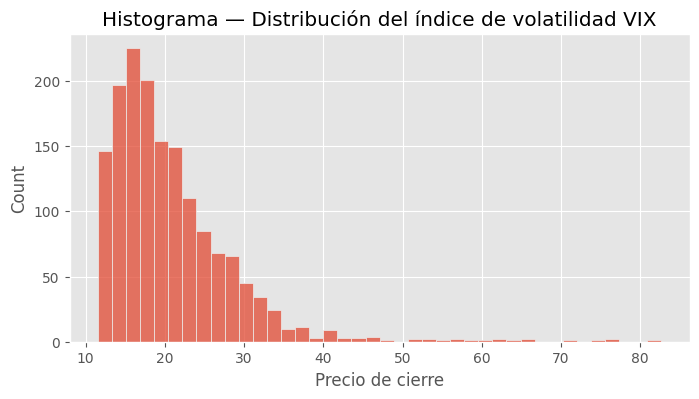

In [90]:
tmp = df[df["ticker"] == "^VIX"]

plt.figure(figsize=(8,4))
sns.histplot(tmp["close"], bins=40)
plt.title("Histograma — Distribución del índice de volatilidad VIX")
plt.xlabel("Precio de cierre")
plt.show()


### El histograma del VIX muestra que entre 2019 y 2025 el mercado se mantuvo en niveles de volatilidad bajos o moderados la mayor parte del tiempo (15–25). Solo hubo episodios puntuales de estrés financiero donde la volatilidad se disparó hasta valores entre 40 y 80. La distribución es claramente asimétrica, indicando que los picos de miedo ocurren, pero son poco frecuentes. En conjunto, el periodo analizado fue mayoritariamente estable. Explica muy bien la franja temporal que hemos vivido, mercado estable con algunos picos por guerras, pandemia y IA

In [ ]:
def plot_group_trend(df, tickers, title):
    """
    Este gráfico dibuja la evolución mensual normalizada (índice 100 en el primer mes)
    de un grupo de tickers.
    """
    # Filtramos tickers y pasamos a formato wide (columnas = ticker)
    tmp = (
        df[df["ticker"].isin(tickers)]
        .pivot(index="date", columns="ticker", values="adj_close")
        .resample("M").last()   # datos mensuales
    )

    # Normalizamos: 100 en el primer valor de cada serie
    norm = tmp / tmp.iloc[0] * 100

    plt.figure(figsize=(12,6))
    for col in norm.columns:
        plt.plot(norm.index, norm[col], label=col)

    plt.title(title)
    plt.ylabel("Índice (100 = inicio)")
    plt.xlabel("Fecha")
    plt.grid(alpha=0.3)
    plt.legend()
    plt.show()


C:\Users\Manuel Peña Torres\AppData\Local\Temp\ipykernel_12396\1962204790.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M").last()   # datos mensuales


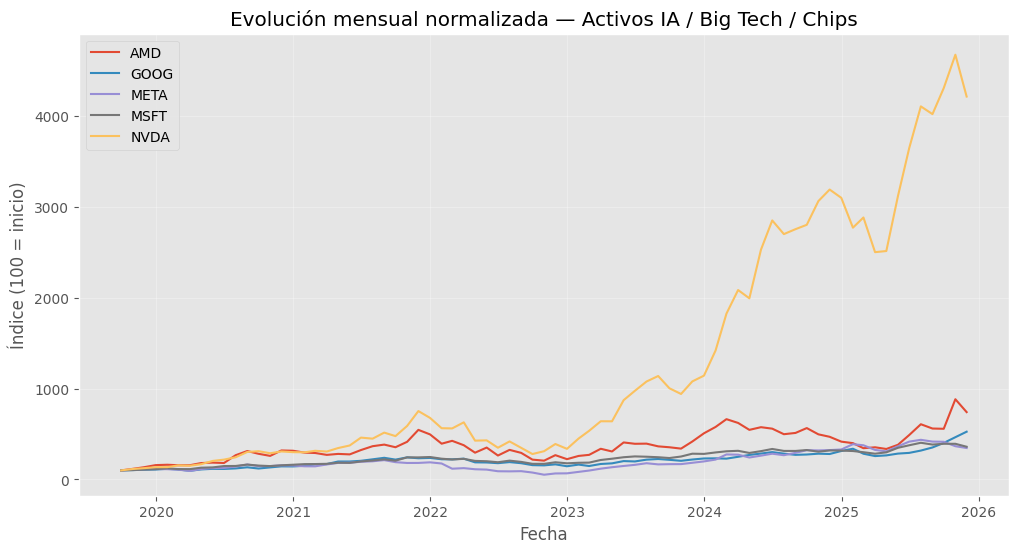

In [ ]:
ia_tickers = [
    "NVDA", "MSFT", "GOOG", "META", "AMD"
]

plot_group_trend(df, ia_tickers,
                 "Evolución mensual normalizada — Activos IA / Big Tech")


C:\Users\Manuel Peña Torres\AppData\Local\Temp\ipykernel_12396\859217665.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tmp.groupby(["ticker", pd.Grouper(key="date", freq="M")])["close"]
C:\Users\Manuel Peña Torres\AppData\Local\Temp\ipykernel_12396\859217665.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tmp.groupby(["ticker", pd.Grouper(key="date", freq="M")])["close"]
C:\Users\Manuel Peña Torres\AppData\Local\Temp\ipykernel_12396\859217665.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tmp.groupby(["ticker", pd.Grouper(key="date", freq="M")])["close"]
C:\Users\Manuel Peña Torres\AppData\Local\Temp\ipykernel_12396\859217665.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tmp.groupby(["ticker", pd.Grouper(key="date", freq="M")])["close"]


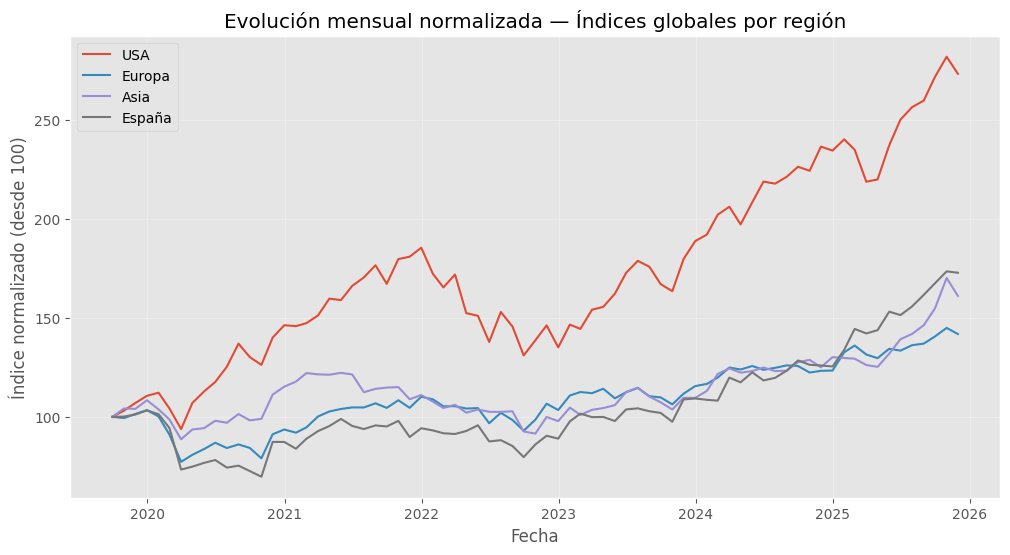

In [ ]:
#Agrupo los índices por región, metiendo españa para compararla globalmente

grupos = {
    "USA": ["^GSPC", "^NDX"],
    "Europa": ["^FTSE", "^STOXX50E"],
    "Asia": ["^N225", "^HSI"],
    "España": ["^IBEX"]
}

df_grouped = []

for region, tickers in grupos.items():
    # Filtrar tickers del grupo
    tmp = df[df["ticker"].isin(tickers)].copy()

    # Datos mensuales (último día del mes)
    monthly = (
        tmp.groupby(["ticker", pd.Grouper(key="date", freq="M")])["close"]
           .last()
           .reset_index()
    )

    # Normalizar cada ticker (100 = inicio), así veremos el crecimiento real de cada uno
    monthly["norm"] = monthly.groupby("ticker")["close"].transform(
        lambda s: (s / s.iloc[0]) * 100
    )

    # Media por región
    region_mean = (
        monthly.groupby("date")["norm"]
               .mean()
               .reset_index()
    )
    region_mean["region"] = region

    df_grouped.append(region_mean)

df_final = pd.concat(df_grouped, ignore_index=True)

plt.figure(figsize=(12,6))

for region in df_final["region"].unique():
    datos = df_final[df_final["region"] == region]
    plt.plot(datos["date"], datos["norm"], label=region)

plt.title("Evolución mensual normalizada — Índices globales por región")
plt.xlabel("Fecha")
plt.ylabel("Índice normalizado (desde 100)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()



C:\Users\Manuel Peña Torres\AppData\Local\Temp\ipykernel_12396\1962204790.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M").last()   # datos mensuales


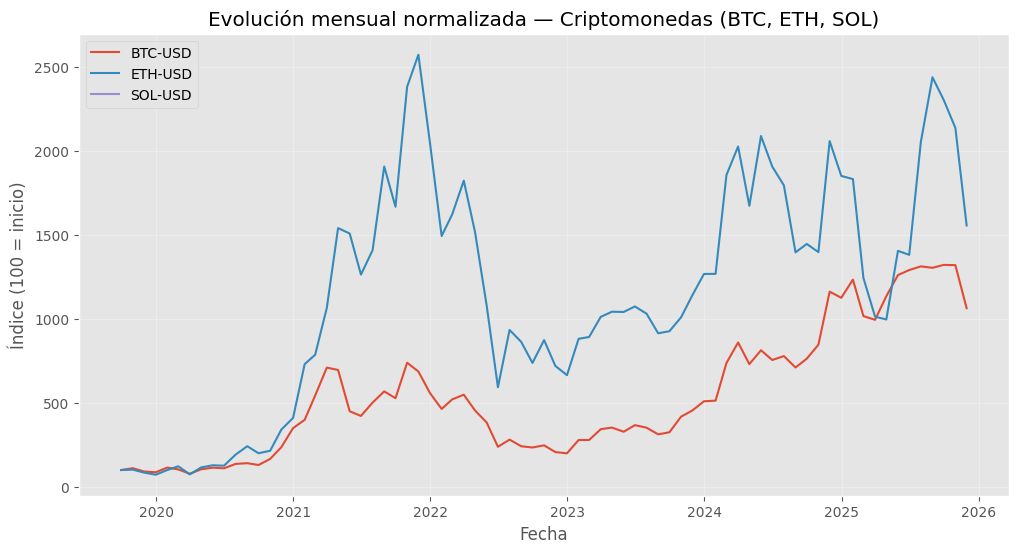

In [80]:
crypto = ["BTC-USD", "ETH-USD", "SOL-USD"]

plot_group_trend(df, crypto,
                 "Evolución mensual normalizada — Criptomonedas (BTC, ETH, SOL)")


In [81]:
spain = ["^IBEX", "EWP", "SAN", "BBVA", "TEF"]

spain_prices = (
    df[df["ticker"].isin(spain)]
    .pivot(index="date", columns="ticker", values="adj_close")
)

# Nos quedamos con las fechas donde TODOS tienen dato
spain_aligned = spain_prices.dropna()
spain_aligned.head()


ticker,BBVA,EWP,SAN,TEF,^IBEX
date,,,,,
2019-09-03,3.297028,21.990360,3.033336,4.339980,8809.200195
2019-09-04,3.346133,22.229561,3.074663,4.415023,8856.599609
2019-09-05,3.472402,22.460516,3.173845,4.440038,8992.700195
2019-09-06,3.472402,22.477015,3.173845,4.490066,8990.099609
2019-09-09,3.563596,22.575998,3.256498,4.577616,9010.599609


In [82]:
first = spain_aligned.iloc[0]
last = spain_aligned.iloc[-1]

ret_spain = (last / first - 1) * 100
ret_spain = ret_spain.sort_values(ascending=False)
ret_spain


ticker
BBVA     526.018356
SAN      234.285388
EWP      127.099502
^IBEX     81.262765
TEF       -4.607861
dtype: float64

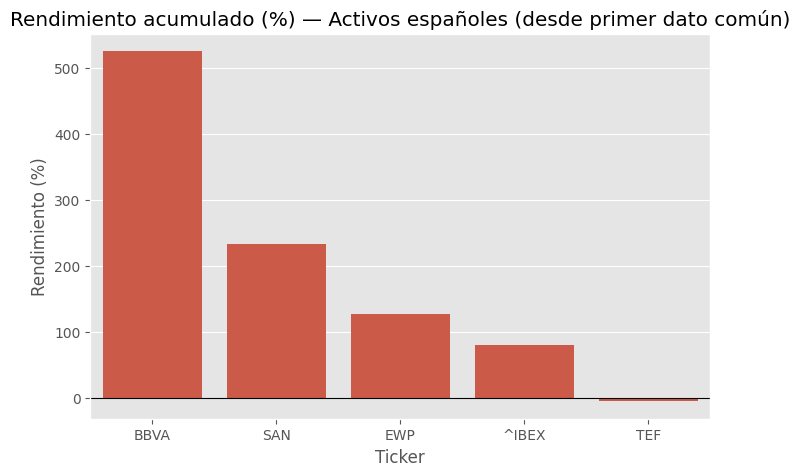

In [83]:
plt.figure(figsize=(8,5))
sns.barplot(x=ret_spain.index, y=ret_spain.values)
plt.title("Rendimiento acumulado (%) — Activos españoles (desde primer dato común)")
plt.ylabel("Rendimiento (%)")
plt.xlabel("Ticker")
plt.axhline(0, color="black", linewidth=0.8)
plt.show()

C:\Users\Manuel Peña Torres\AppData\Local\Temp\ipykernel_12396\1962204790.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M").last()   # datos mensuales


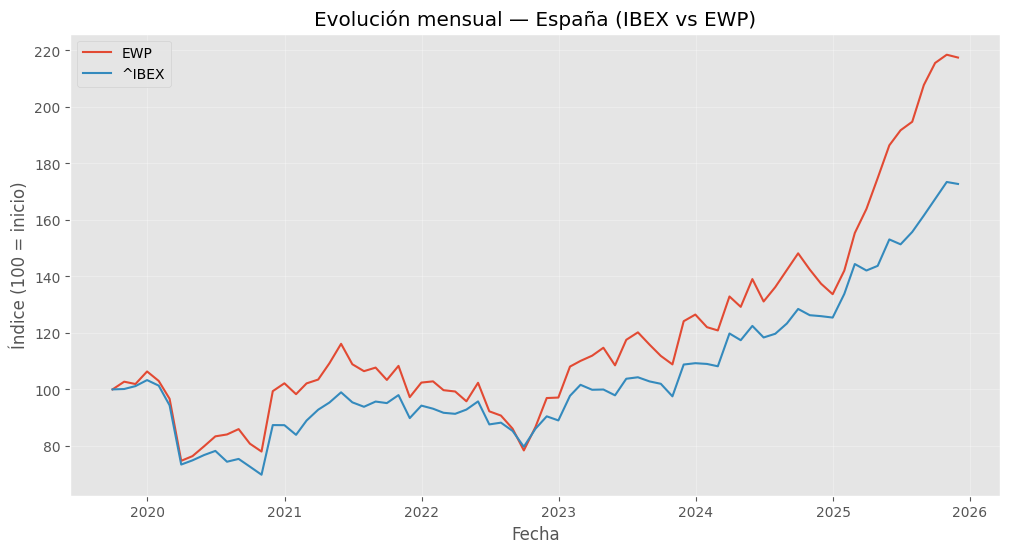

In [84]:
plot_group_trend(df, ["^IBEX", "EWP"],
                 "Evolución mensual — España (IBEX vs EWP)")


# Oro VS Dólar

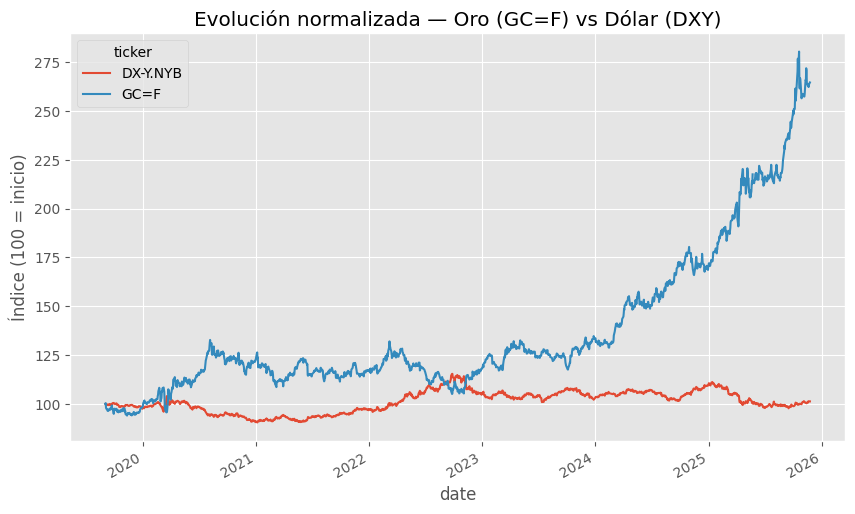

In [86]:
subset = df[df["ticker"].isin(["GC=F", "DX-Y.NYB"])]
subset_m = subset.groupby(["date", "ticker"])["close"].mean().unstack()

subset_norm = subset_m / subset_m.iloc[0] * 100

subset_norm.plot(figsize=(10,6))
plt.title("Evolución normalizada — Oro (GC=F) vs Dólar (DXY)")
plt.ylabel("Índice (100 = inicio)")
plt.grid(True)
plt.show()


# Bitcoin VS Oro

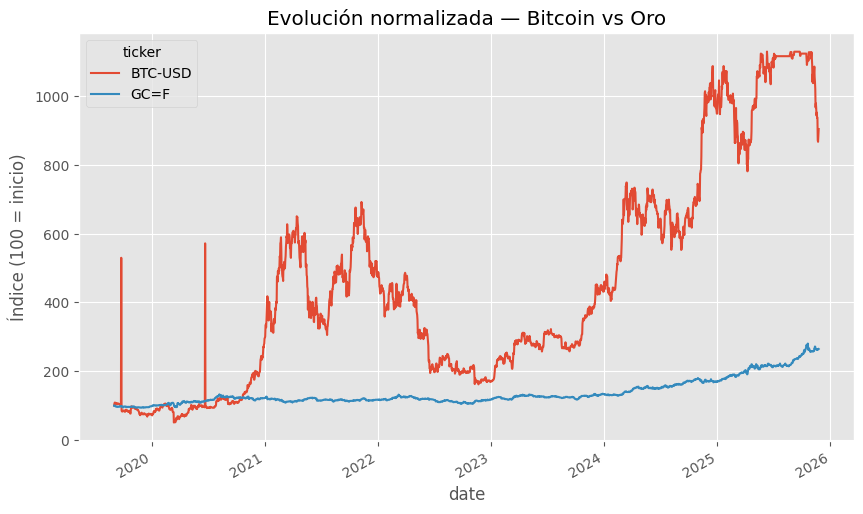

In [87]:
subset = df[df["ticker"].isin(["GC=F", "BTC-USD"])]

# Pivot diario
pivot = subset.pivot(index="date", columns="ticker", values="close")

# Forward y backward fill para evitar huecos de datos
pivot = pivot.ffill().bfill()

# Normalización desde el primer valor válido de cada serie
pivot_norm = pivot / pivot.iloc[0] * 100

pivot_norm.plot(figsize=(10,6))
plt.title("Evolución normalizada — Bitcoin vs Oro")
plt.ylabel("Índice (100 = inicio)")
plt.grid(True)
plt.show()


In [88]:
df[df["ticker"] == "GC=F"].head()


,date,ticker,open,high,low,close,adj_close,volume
32637,2019-09-03,GC=F,1522.900024,1547.300049,1521.000000,1545.900024,1545.900024,139.0
32638,2019-09-04,GC=F,1549.000000,1553.199951,1534.800049,1550.300049,1550.300049,46.0
32639,2019-09-05,GC=F,1551.000000,1551.099976,1511.099976,1515.400024,1515.400024,125.0
32640,2019-09-06,GC=F,1551.000000,1526.000000,1504.500000,1506.199951,1506.199951,54.0
32641,2019-09-09,GC=F,1509.000000,1513.000000,1498.000000,1502.199951,1502.199951,69.0


In [89]:
df[df["ticker"] == "GC=F"]["close"].isna().sum()


0